# setting the environment

In [1]:
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex4 import *
print("Setup Complete")

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer

Setup Complete


# selecting the columns for modeling

In [2]:



X_full = pd.read_csv('../input/train.csv', index_col='Id')
full=X_full.copy()
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')


categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() < 10 and 
                    X_full[cname].dtype == "object"]

numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['int64', 'float64']]



# removing missing values from prediction column and seperating test column in given data

In [3]:
my_cols = categorical_cols + numerical_cols
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
X_full = X_full[my_cols].copy()
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)
numerical_cols.remove('SalePrice')
my_cols=categorical_cols + numerical_cols
X_test = X_test_full[my_cols].copy()



# preparing columns for imputation

In [4]:
num_X_full=X_full[numerical_cols]
num_X_test=X_test[numerical_cols]

cat_X_full=X_full[categorical_cols]
cat_X_test=X_test[categorical_cols]

# performing imputation and confirming handling of missing values

In [5]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_full = pd.DataFrame(my_imputer.fit_transform(num_X_full))
imputed_X_test = pd.DataFrame(my_imputer.transform(num_X_test))

# Imputation removed column names; put them back
imputed_X_full.columns = num_X_full.columns
imputed_X_test.columns = num_X_test.columns

num_X_full=imputed_X_full.copy()
num_X_test=imputed_X_test.copy()

my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_full = pd.DataFrame(my_imputer.fit_transform(cat_X_full))
imputed_X_test = pd.DataFrame(my_imputer.transform(cat_X_test))

# Imputation removed column names; put them back
imputed_X_full.columns = cat_X_full.columns
imputed_X_test.columns = cat_X_test.columns

cat_X_full=imputed_X_full.copy()
cat_X_test=imputed_X_test.copy()


X_full=pd.concat([cat_X_full, num_X_full],
                  axis = 1).copy()
X_test=pd.concat([cat_X_test, num_X_test],
                  axis = 1).copy()
print(cat_X_test)
print(X_test)
missing_val_count_by_column = (X_test.isnull().sum()) # * ye har column ke agay btata hai k kitni missing values 
print(missing_val_count_by_column[missing_val_count_by_column>0]) # * jin ki missing values more than 0
print(len(missing_val_count_by_column[missing_val_count_by_column>0]))

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RH   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
2          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave  Grvl      IR1         HLS    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1454       RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Mod   

     Condition1 Condition2 

# labal encoding so that categorical columns can contribute more efficiently in modeling

In [6]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_full[col] = label_encoder.fit_transform(X_full[col])
    X_test[col] = label_encoder.transform(X_test[col])
    


# splitting data for training and validation 

In [7]:

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

print(X_train.shape)
print(X_test.shape)


(1168, 76)
(1459, 76)


# Q1 which type of huse will have max price (with paved street or gravel)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

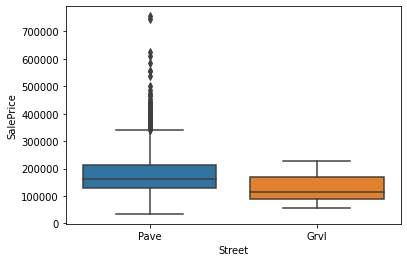

In [8]:
import matplotlib.pylab as plt
import seaborn as sns
sns.boxplot(x="Street", y='SalePrice', data=full)

# Q2 which type of houses are more frequent in data(low cost,average price, high cost) i.e, distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


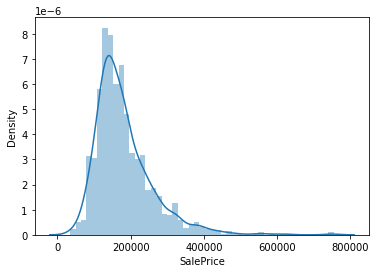

In [9]:
sns.distplot(y);

# q3 how in each neighbourhood, the yearbuilt effect price

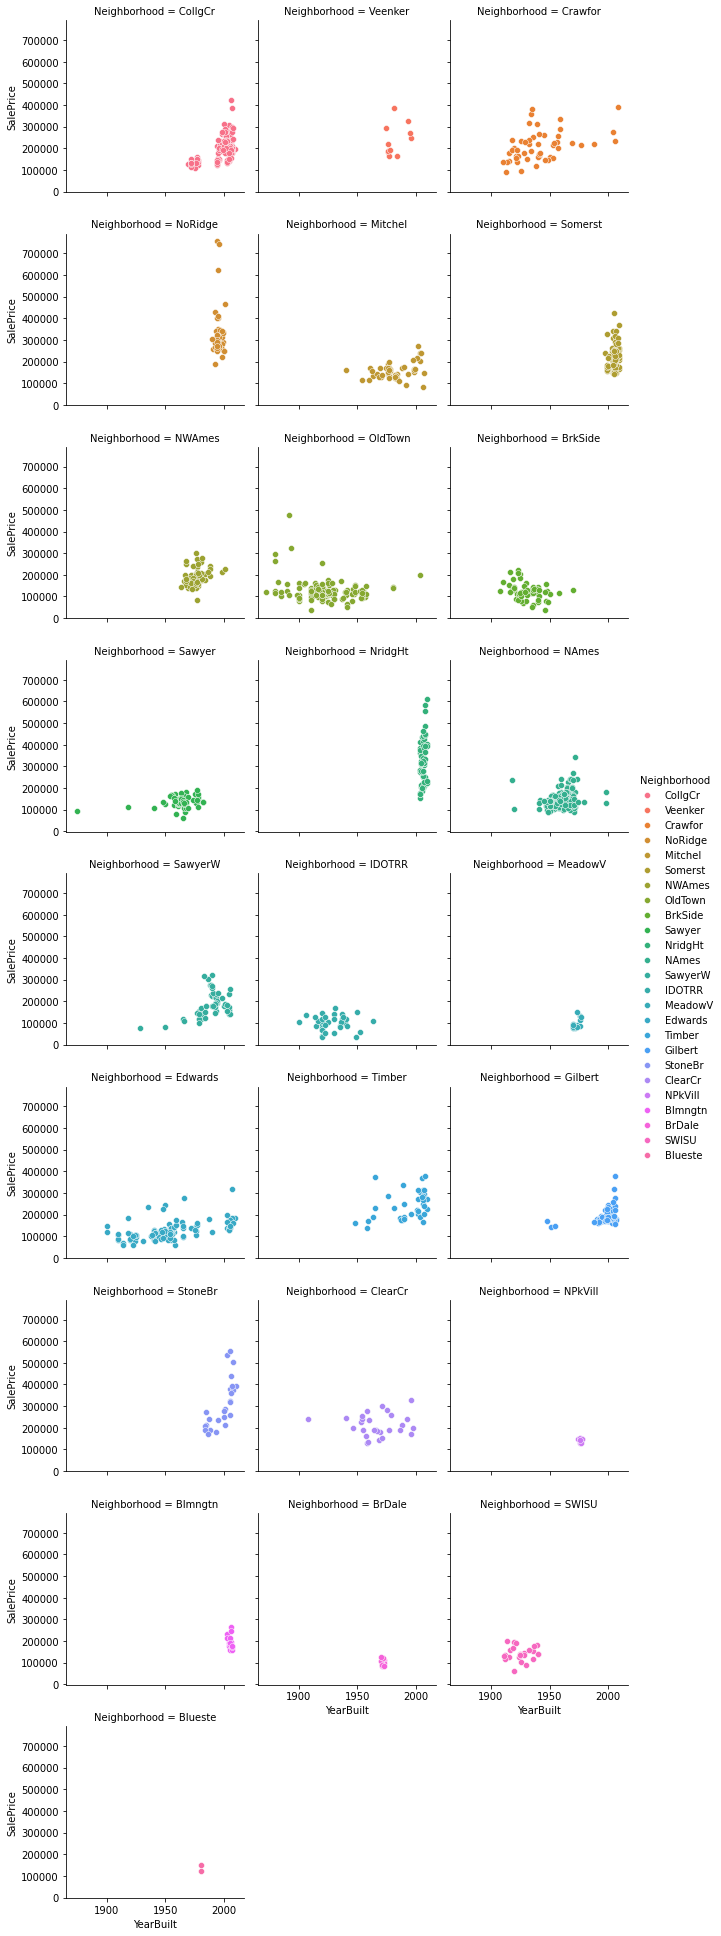

In [10]:
grid=sns.FacetGrid(full,col="Neighborhood",hue="Neighborhood",col_wrap=3)# hue ussi column(har region) ko different color de ga
                                            #kitne columns mein isse {wrap}show krana krna hai
grid.map(sns.scatterplot,"YearBuilt","SalePrice")
                                #  x y ki zrort nhi
grid.add_legend() #proper labelling


# q4 the mean relation between the SalePrice and shape and contour of land

In [11]:
group_df = full[['LotShape','LandContour','SalePrice']]
D_B_P = group_df.groupby(['LotShape','LandContour'],as_index=False).mean()
D_B_P

,LotShape,LandContour,SalePrice
0,IR1,Bnk,144034.210526
1,IR1,HLS,243759.875000
2,IR1,Low,220270.588235
3,IR1,Lvl,205460.673077
4,IR2,Bnk,169811.333333
5,IR2,HLS,348445.000000
6,IR2,Low,231200.000000
7,IR2,Lvl,233584.620690
8,IR3,Bnk,116500.000000
9,IR3,HLS,274725.000000


# q5 how may houses have pavedor gravel street and what type of alleys do they have

<AxesSubplot:xlabel='Alley', ylabel='count'>

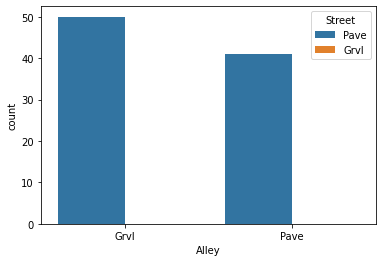

In [12]:
# count plot on two categorical variable
sns.countplot(x ='Alley', hue = "Street", data = full)

# two different methodologies for modeling decision trees

# RandomForrest approach

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


model = RandomForestRegressor(n_estimators=100, random_state=0)



# Preprocessing of training data, fit model 
model.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = model.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17449.79866438356


In [14]:
preds_test = model.predict(X_test) 

In [15]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

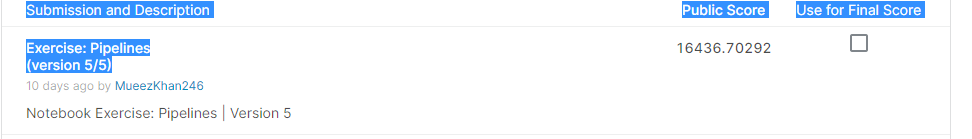

# XGBoost approach

In [16]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
preds = my_model.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 16697.320419520547


In [17]:
preds_test =my_model.predict(X_test) 

In [18]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

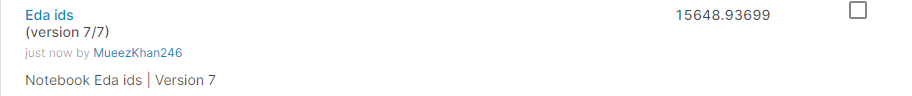
